# Import & Clean Data
Let us read the State Time Series data and do some basic analysis. The data is available from 2010 onwards, so let us remove the previous data from the data set.

In [94]:
import pandas as pd
df = pd.read_csv('zecon/State_time_series.csv')
df.Date = pd.to_datetime(df.Date)
df = df[df['Date'] >= '01-01-2010']
df.head()

,Date,RegionName,DaysOnZillow_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
8157,2010-01-31,Alabama,168.0,32618.0,29765.0,NaN,98.633257,93.087748,103.971150,110.909091,...,67900.0,137400.0,123900.0,123400.0,232600.0,NaN,NaN,NaN,NaN,NaN
8158,2010-01-31,Alaska,130.0,3477.0,2748.0,182.03125,163.834951,154.224835,144.439421,125.418060,...,177200.0,176100.0,247200.0,257100.0,356200.0,NaN,NaN,NaN,NaN,NaN
8159,2010-01-31,Arizona,112.0,50231.0,50482.0,NaN,NaN,NaN,NaN,NaN,...,95800.0,121900.0,161500.0,168800.0,298500.0,NaN,NaN,NaN,NaN,NaN
8160,2010-01-31,Arkansas,121.0,18473.0,17416.0,NaN,81.283906,86.214953,94.750000,96.683503,...,59200.0,127300.0,105700.0,105700.0,185000.0,NaN,NaN,NaN,NaN,NaN
8161,2010-01-31,California,108.0,138662.0,132187.0,NaN,NaN,NaN,NaN,NaN,...,163600.0,313600.0,335100.0,340000.0,655700.0,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)
Let us explore statewise data. Whether there is any trend for a specific state or what are the top 5 states?

## Top 7 States of Median Price Per Sqft
This is the top 7 states of Median Listring Price per Sqft All Homes

In [95]:
dfallhomes = df.groupby('RegionName', as_index=False)['MedianListingPricePerSqft_AllHomes'].\
    mean().dropna().sort_values('MedianListingPricePerSqft_AllHomes', ascending=False)
dfallhomes.head(7)

,RegionName,MedianListingPricePerSqft_AllHomes
8,DistrictofColumbia,419.093624
11,Hawaii,410.104882
4,California,267.298446
21,Massachusetts,205.758438
32,NewYork,172.085814
39,RhodeIsland,171.417274
5,Colorado,171.243077


## Bottom 5 states of Median Listing Price per Sqft All Homes
List the bottom 5 states from the results

In [93]:
dfallhomes.tail(5)

NameError: name 'dfallhomes' is not defined

## Trend in State Time Series
The most important EDA on time series data is to identify trend, seasonality & correlation. Let us check whether there is any trend in the data with the Top state data.

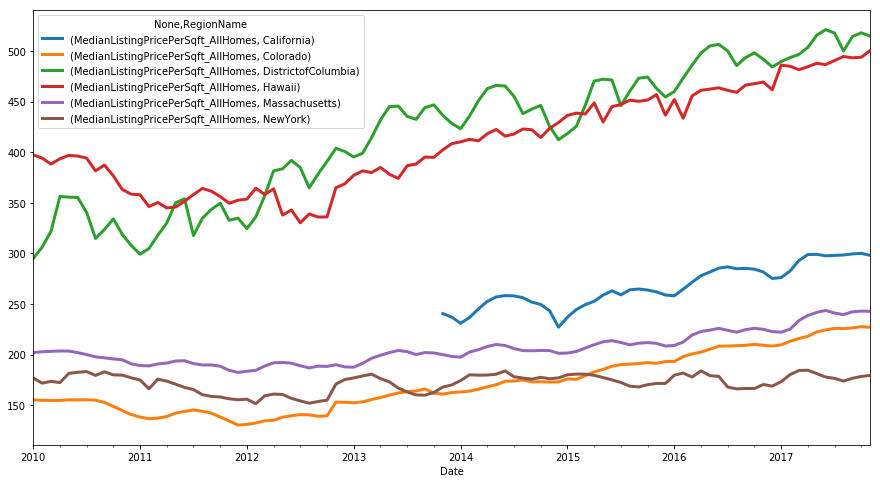

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
statelist = ['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'Colorado']
stateseries = pd.DataFrame(df[(df['RegionName'].\
    isin(statelist))][['Date','RegionName','MedianListingPricePerSqft_AllHomes']].\
    dropna().\
    groupby(['Date', 'RegionName'])['RegionName','MedianListingPricePerSqft_AllHomes'].mean().unstack())
stateseries.plot(figsize=(15,8), linewidth=3)
plt.show()

from the above graph, we can see that
1. There are trends for Hawaii & District of Columbia, even though it is up & down but there is a strong upward trend on these two states. This also shows that there is a seasonality in the trends. But the investment is costly in these two states.
2. There is no point in investing the homes in New York, it's almost stationary.
3. The similar trend of top 2 states is reflecting in Colorado also. This seems to be the best investment for homes as it is steadily increasing over the years among the top 5.

## Seasonality in trends
Let us check whether there is any seasonality in the trends. This is important for the predictions.

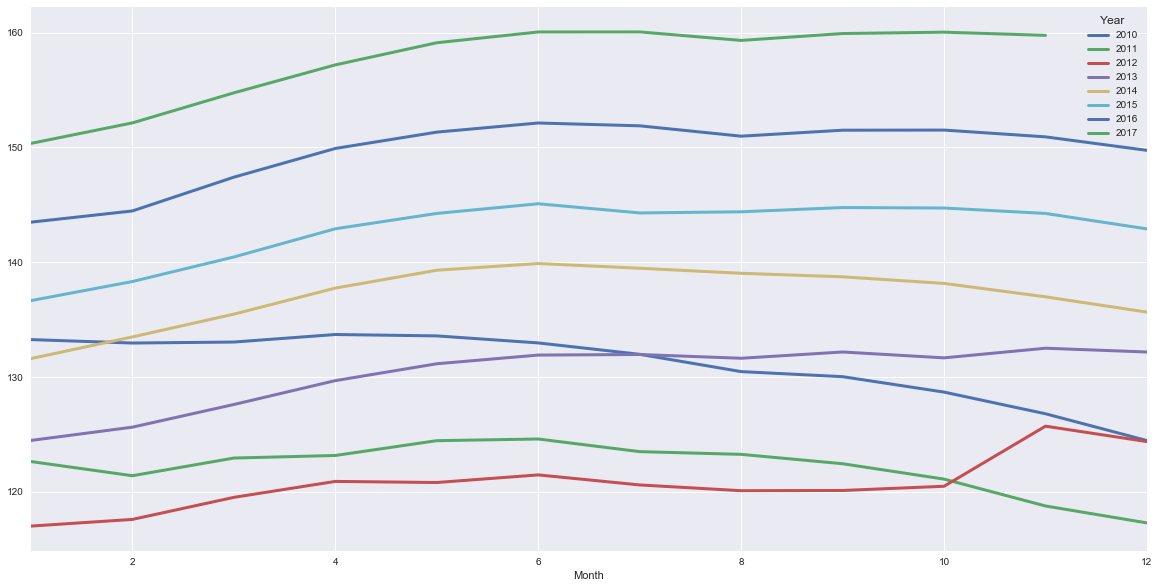

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
season = df
season['Date'] = df.Date
season['Year'] = df['Date'].dt.year
season['Month'] = df['Date'].dt.month
spivot = pd.pivot_table(season, index='Month', columns = 'Year', values = 'MedianListingPricePerSqft_AllHomes', aggfunc=np.mean)
spivot.plot(figsize=(20,10), linewidth=3)
plt.show()

from above graph, we can see that
1. The price start decreasing in year 2010 and continued till 2012. The price in year 2013 is almost equivalent to 2010.
2. The best time to sell the house in a year is from June to October. The price is peak in these months consistently in all the years even during the down trend. Alternatively the best time to buy the house is in December & January.
3. The price drops may be due to holiday season or some other reason is a problem for us to solve another day.

## Correlation
I always have a doubt whether various bedroom types have any relation during the trends. Let's find out.

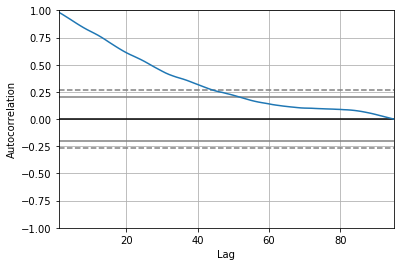

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

brtypes = df.groupby('Date')['Date','MedianListingPricePerSqft_1Bedroom', 'MedianListingPricePerSqft_2Bedroom','MedianListingPricePerSqft_3Bedroom','MedianListingPricePerSqft_4Bedroom','MedianListingPricePerSqft_5BedroomOrMore'].\
    mean().dropna()
pd.plotting.autocorrelation_plot(brtypes);
plt.show()

The above graph shows there is a positive correlation for all the bedroom types, but still it is not clear how each bedroom types are correlated. Let us find out.

In [34]:
brtypes.corr()

,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
MedianListingPricePerSqft_1Bedroom,1.000000,0.869769,0.834149,0.776416,0.748781
MedianListingPricePerSqft_2Bedroom,0.869769,1.000000,0.995036,0.980379,0.970255
MedianListingPricePerSqft_3Bedroom,0.834149,0.995036,1.000000,0.993445,0.983750
MedianListingPricePerSqft_4Bedroom,0.776416,0.980379,0.993445,1.000000,0.995176
MedianListingPricePerSqft_5BedroomOrMore,0.748781,0.970255,0.983750,0.995176,1.000000


The above table confirms the correlation and to be more specific let us remove the seasonality from the data and see. This is called order of correlation.

In [35]:
brtypes.diff().corr()

,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore
MedianListingPricePerSqft_1Bedroom,1.000000,0.648134,0.688513,0.634148,0.558673
MedianListingPricePerSqft_2Bedroom,0.648134,1.000000,0.936531,0.914260,0.872121
MedianListingPricePerSqft_3Bedroom,0.688513,0.936531,1.000000,0.951192,0.878442
MedianListingPricePerSqft_4Bedroom,0.634148,0.914260,0.951192,1.000000,0.910900
MedianListingPricePerSqft_5BedroomOrMore,0.558673,0.872121,0.878442,0.910900,1.000000


First order difference in correlation still has better correlation between bedroom types. You can see 1 Bedroom & 2 Bedroom are highly correlated than 1 bedroom & 5 bedroom. 

# Forecast
We will do the forecast with Median Listing price per sq ft All Homes. Let us see the trend first.

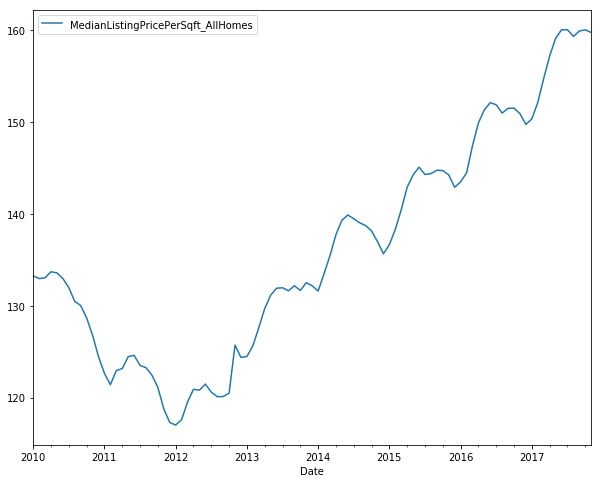

In [4]:
allhomes = df.groupby('Date')['Date','MedianListingPricePerSqft_AllHomes'].mean().dropna()
allhomes.plot(figsize=(10,8))
plt.show()

In the above graph, you can see the clear trend but also there are seasonality in the trend. The forecast for the time series should be stationary otherwise the predictions may not correct.

## ARIMA forecast model
One of the common model used to forecast time series data is ARIMA. It stands for Autoregressive integrated moving average. One of the parameters are p, d & q. There is a separate process to to identify the optmimum parameters, i will skip that now due to huge manual process.

A simple way to identify the p-lag is to draw the autocorrelation plot.

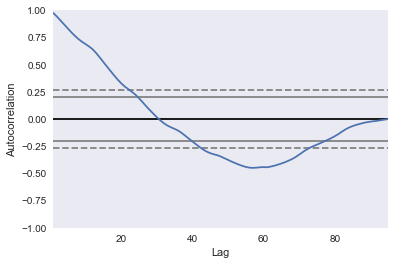

In [39]:
pd.plotting.autocorrelation_plot(allhomes);

From the above graph, we can select 15 as lag and then start 0, need to run and check the optimimum parameters.

C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                                       ARIMA Model Results                                       
Dep. Variable:     D2.MedianListingPricePerSqft_AllHomes   No. Observations:                   93
Model:                                   ARIMA(15, 2, 0)   Log Likelihood                -125.793
Method:                                          css-mle   S.D. of innovations              0.909
Date:                                   Tue, 06 Feb 2018   AIC                            285.585
Time:                                           22:15:37   BIC                            328.639
Sample:                                       03-31-2010   HQIC                           302.969
                                            - 11-30-2017                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

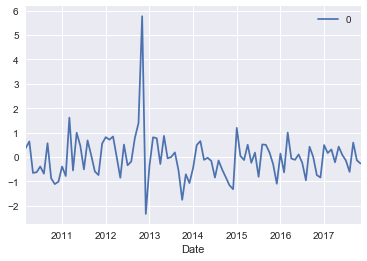

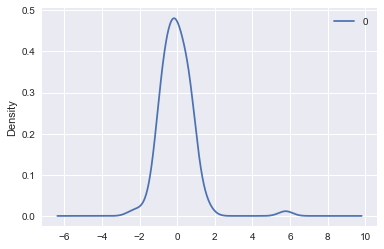

,0
count,93.000000
mean,-0.033567
std,0.925246
min,-2.331270
25%,-0.609413
50%,-0.116738
75%,0.488536
max,5.766544


In [40]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame

model = ARIMA(allhomes, order=(15,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
residuals.describe()

Residuals plot shows there are residual errors in the forecast and the KDE plot clearly shows that the curve is not in the zero. This can be further optimized by changing values based on the ARIMA model results summary.

Let us use forecast() method of ARIMA to forecast the data. Before predicting for the next year, let us validate the model first. I have splitted the dataset into Train & Test with 40% as test data. Usually we should split by 50% but when i tried that i got an error that data is not stationary to predict. So instead of having stationary mean data, i would like to predict with seasons.

C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\rgraj\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

Test RMSE: 0.691


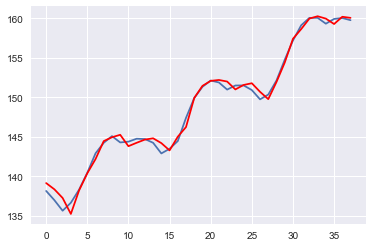

In [42]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = allhomes.values
train_size = int(len(X) * 0.60)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = ARIMA(history, order=(15,2,0))
	model_fit = model.fit()
	fcast = model_fit.forecast()[0]
	predictions.append(fcast)
	history.append(test[t])

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In the above graph the blue line is the actual value and the red line is the predicted value. The predictions are almost equivalent to the test data.

In [52]:
forecast = list()
model = ARIMA(history, order=(15,2,0))
model_fit = model.fit(disp=0)
forecast = model_fit.forecast(steps=12)[0]
for fcast in forecast:
    print(fcast)

159.824124926
160.496615088
162.368488401
164.690637782
167.156354642
169.053416451
169.992050043
170.328109381
170.395046687
170.693905824
171.157603859
171.454838878


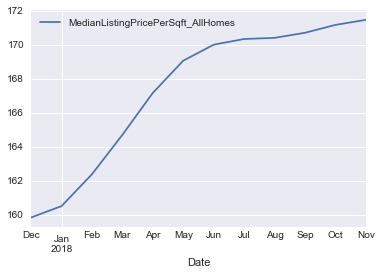

In [77]:
future = pd.date_range('12/31/2017', periods=12,freq='M')
futdict = {'Date' : future, 'MedianListingPricePerSqft_AllHomes' : forecast}
ts = pd.DataFrame(futdict)
ts.set_index('Date', inplace=True)
ts.plot();

The above is the prediction for next 12 months and you can see the graph shows the seasonality as earlier like the price is reducing in Dec 2017 and then it is getting reduced in Oct/Nov 2018

In [94]:
import itertools
#p = [14, 15, 16]
#d = [14, 15, 16]
#q = [14, 15, 16]
p = range(2, 5)
d = range(0, 5)
q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (2, 0, 1) x (2, 0, 1, 12)
SARIMAX: (2, 0, 1) x (2, 0, 2, 12)
SARIMAX: (2, 0, 2) x (2, 0, 3, 12)
SARIMAX: (2, 0, 2) x (2, 0, 4, 12)


In [ ]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(allhomes,
                                               order = param,
                                               seasonal_order = param_seasonal,
                                               enforce_stationarity = False,
                                               enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA {}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
    

ARIMA (2, 0, 0)x(2, 0, 0, 12)12 - AIC:216.85988210993904
ARIMA (2, 0, 0)x(2, 0, 1, 12)12 - AIC:200.4445181621184
ARIMA (2, 0, 0)x(2, 0, 2, 12)12 - AIC:2008.326369749968
ARIMA (2, 0, 0)x(2, 1, 0, 12)12 - AIC:118.38718444178286
ARIMA (2, 0, 0)x(2, 1, 1, 12)12 - AIC:113.77931110675783
ARIMA (2, 0, 0)x(2, 1, 2, 12)12 - AIC:115.3628193402038
ARIMA (2, 0, 0)x(2, 2, 0, 12)12 - AIC:96.39045186217571
ARIMA (2, 0, 0)x(2, 2, 1, 12)12 - AIC:90.6572774118643
ARIMA (2, 0, 0)x(2, 3, 0, 12)12 - AIC:98.49967513478381
ARIMA (2, 0, 0)x(2, 3, 1, 12)12 - AIC:100.801949563671
ARIMA (2, 0, 0)x(2, 4, 0, 12)12 - AIC:84.2975031067007
ARIMA (2, 0, 0)x(2, 4, 1, 12)12 - AIC:694.6233183071917
ARIMA (2, 0, 0)x(3, 0, 0, 12)12 - AIC:116.83618246837318
ARIMA (2, 0, 0)x(3, 0, 1, 12)12 - AIC:112.43692944445031
ARIMA (2, 0, 0)x(3, 0, 2, 12)12 - AIC:1789.9900915127841
ARIMA (2, 0, 0)x(3, 1, 0, 12)12 - AIC:70.435088254976
ARIMA (2, 0, 0)x(3, 1, 1, 12)12 - AIC:64.57575325599326
ARIMA (2, 0, 0)x(3, 1, 2, 12)12 - AIC:64.687139

ARIMA (2, 0, 4)x(2, 4, 0, 12)12 - AIC:87.30687863432834
ARIMA (2, 0, 4)x(2, 4, 1, 12)12 - AIC:1271.7738853980932
ARIMA (2, 0, 4)x(3, 0, 0, 12)12 - AIC:116.85796996843902
ARIMA (2, 0, 4)x(3, 0, 1, 12)12 - AIC:116.6794523963689
ARIMA (2, 0, 4)x(3, 0, 2, 12)12 - AIC:1791.045674730271
ARIMA (2, 0, 4)x(3, 1, 0, 12)12 - AIC:93.44791647247864
ARIMA (2, 0, 4)x(3, 1, 1, 12)12 - AIC:92.48442664702463
ARIMA (2, 0, 4)x(3, 1, 2, 12)12 - AIC:70.8064587744783
ARIMA (2, 0, 4)x(3, 2, 0, 12)12 - AIC:70.08772234327517
ARIMA (2, 0, 4)x(3, 2, 1, 12)12 - AIC:72.79267796486272
ARIMA (2, 0, 4)x(3, 3, 0, 12)12 - AIC:50.61487361857375
ARIMA (2, 0, 4)x(3, 3, 1, 12)12 - AIC:52.34136231179265
ARIMA (2, 0, 4)x(3, 4, 0, 12)12 - AIC:16.526448392304538
ARIMA (2, 0, 4)x(3, 4, 1, 12)12 - AIC:286.25242621976156
ARIMA (2, 0, 4)x(4, 0, 0, 12)12 - AIC:73.19418220485987
ARIMA (2, 0, 4)x(4, 0, 1, 12)12 - AIC:73.7636507137606
ARIMA (2, 0, 4)x(4, 0, 2, 12)12 - AIC:1460.3559626593446
ARIMA (2, 0, 4)x(4, 1, 0, 12)12 - AIC:37.1239

ARIMA (2, 1, 3)x(3, 3, 0, 12)12 - AIC:57.42841863399271
ARIMA (2, 1, 3)x(3, 3, 1, 12)12 - AIC:59.17046128807539
ARIMA (2, 1, 3)x(3, 4, 0, 12)12 - AIC:1.2944210451925144
ARIMA (2, 1, 3)x(3, 4, 1, 12)12 - AIC:7.320161453089209
ARIMA (2, 1, 3)x(4, 0, 0, 12)12 - AIC:71.90737245226943
ARIMA (2, 1, 3)x(4, 0, 1, 12)12 - AIC:68.79407284662882
ARIMA (2, 1, 3)x(4, 0, 2, 12)12 - AIC:1659.9497398879403
ARIMA (2, 1, 3)x(4, 1, 0, 12)12 - AIC:44.737159374877386
ARIMA (2, 1, 3)x(4, 1, 1, 12)12 - AIC:47.25994675881603
ARIMA (2, 1, 3)x(4, 1, 2, 12)12 - AIC:48.78677346757628
ARIMA (2, 1, 3)x(4, 2, 0, 12)12 - AIC:25.58980064041602
ARIMA (2, 1, 3)x(4, 2, 1, 12)12 - AIC:26.967436161080823
ARIMA (2, 1, 3)x(4, 3, 0, 12)12 - AIC:11.092301114543812
ARIMA (2, 1, 3)x(4, 3, 1, 12)12 - AIC:14.269309844752017
ARIMA (2, 1, 4)x(2, 0, 0, 12)12 - AIC:211.0254019471027
ARIMA (2, 1, 4)x(2, 0, 1, 12)12 - AIC:206.0421303485514
ARIMA (2, 1, 4)x(2, 0, 2, 12)12 - AIC:2132.9699380506067
ARIMA (2, 1, 4)x(2, 1, 0, 12)12 - AIC:114

ARIMA (2, 2, 2)x(4, 2, 0, 12)12 - AIC:31.802203456701864
ARIMA (2, 2, 2)x(4, 2, 1, 12)12 - AIC:33.67958085028242
ARIMA (2, 2, 2)x(4, 3, 0, 12)12 - AIC:17.859759697451064
ARIMA (2, 2, 2)x(4, 3, 1, 12)12 - AIC:43.06948031389817
ARIMA (2, 2, 3)x(2, 0, 0, 12)12 - AIC:213.52104706542175
ARIMA (2, 2, 3)x(2, 0, 1, 12)12 - AIC:195.67679366191453
ARIMA (2, 2, 3)x(2, 0, 2, 12)12 - AIC:2361.070605865374
ARIMA (2, 2, 3)x(2, 1, 0, 12)12 - AIC:121.47409085000069
ARIMA (2, 2, 3)x(2, 1, 1, 12)12 - AIC:110.25695992261002
ARIMA (2, 2, 3)x(2, 1, 2, 12)12 - AIC:1664.4134838579103
ARIMA (2, 2, 3)x(2, 2, 0, 12)12 - AIC:97.03444331615587
ARIMA (2, 2, 3)x(2, 2, 1, 12)12 - AIC:93.18960706308314
ARIMA (2, 2, 3)x(2, 3, 0, 12)12 - AIC:100.46785105335839
ARIMA (2, 2, 3)x(2, 3, 1, 12)12 - AIC:100.25597866955856
ARIMA (2, 2, 3)x(2, 4, 0, 12)12 - AIC:83.74315781963824
ARIMA (2, 2, 3)x(2, 4, 1, 12)12 - AIC:818.6551196918952
ARIMA (2, 2, 3)x(3, 0, 0, 12)12 - AIC:120.25473000321469
ARIMA (2, 2, 3)x(3, 0, 1, 12)12 - AIC:

ARIMA (2, 3, 2)x(2, 2, 0, 12)12 - AIC:107.24722986970124
ARIMA (2, 3, 2)x(2, 2, 1, 12)12 - AIC:100.15716968660357
ARIMA (2, 3, 2)x(2, 3, 0, 12)12 - AIC:106.83164574459104
ARIMA (2, 3, 2)x(2, 3, 1, 12)12 - AIC:104.1871794574702
ARIMA (2, 3, 2)x(2, 4, 0, 12)12 - AIC:87.74910131805967
ARIMA (2, 3, 2)x(2, 4, 1, 12)12 - AIC:757.0002072933889
ARIMA (2, 3, 2)x(3, 0, 0, 12)12 - AIC:121.82860738876514
ARIMA (2, 3, 2)x(3, 0, 1, 12)12 - AIC:120.18469968284529
ARIMA (2, 3, 2)x(3, 0, 2, 12)12 - AIC:2267.1848633565896
ARIMA (2, 3, 2)x(3, 1, 0, 12)12 - AIC:82.56735488348328
ARIMA (2, 3, 2)x(3, 1, 1, 12)12 - AIC:76.97362861838917
ARIMA (2, 3, 2)x(3, 1, 2, 12)12 - AIC:1655.9796307203183
ARIMA (2, 3, 2)x(3, 2, 0, 12)12 - AIC:72.1896360772457
ARIMA (2, 3, 2)x(3, 2, 1, 12)12 - AIC:75.43421753596118
ARIMA (2, 3, 2)x(3, 3, 0, 12)12 - AIC:65.81681479625964
ARIMA (2, 3, 2)x(3, 3, 1, 12)12 - AIC:67.20432765520536
ARIMA (2, 3, 2)x(3, 4, 0, 12)12 - AIC:14.326462297363548
ARIMA (2, 3, 2)x(3, 4, 1, 12)12 - AIC:260

ARIMA (2, 4, 1)x(3, 1, 1, 12)12 - AIC:110.04601467544063
ARIMA (2, 4, 1)x(3, 1, 2, 12)12 - AIC:1489.041735419472
ARIMA (2, 4, 1)x(3, 2, 0, 12)12 - AIC:86.49460382658047
ARIMA (2, 4, 1)x(3, 2, 1, 12)12 - AIC:88.89128108028606
ARIMA (2, 4, 1)x(3, 3, 0, 12)12 - AIC:77.42590067725274
ARIMA (2, 4, 1)x(3, 3, 1, 12)12 - AIC:66.8178632295208
ARIMA (2, 4, 1)x(3, 4, 0, 12)12 - AIC:54.31158262789997
ARIMA (2, 4, 1)x(3, 4, 1, 12)12 - AIC:210.87275855754933
ARIMA (2, 4, 1)x(4, 0, 0, 12)12 - AIC:110.32796087353822
ARIMA (2, 4, 1)x(4, 0, 1, 12)12 - AIC:110.68229804377155
ARIMA (2, 4, 1)x(4, 0, 2, 12)12 - AIC:1425.8362065733313
ARIMA (2, 4, 1)x(4, 1, 0, 12)12 - AIC:69.84486591880841
ARIMA (2, 4, 1)x(4, 1, 1, 12)12 - AIC:70.91126676920769
ARIMA (2, 4, 1)x(4, 1, 2, 12)12 - AIC:1171.9661424113488
ARIMA (2, 4, 1)x(4, 2, 0, 12)12 - AIC:50.36035492759526
ARIMA (2, 4, 1)x(4, 2, 1, 12)12 - AIC:50.174932004277544
ARIMA (2, 4, 1)x(4, 3, 0, 12)12 - AIC:23.10833985264265
ARIMA (2, 4, 1)x(4, 3, 1, 12)12 - AIC:13.9

ARIMA (3, 0, 0)x(4, 0, 2, 12)12 - AIC:1579.8699911361914
ARIMA (3, 0, 0)x(4, 1, 0, 12)12 - AIC:34.90537374983288
ARIMA (3, 0, 0)x(4, 1, 1, 12)12 - AIC:36.32297256296917
ARIMA (3, 0, 0)x(4, 1, 2, 12)12 - AIC:36.290595476782556
ARIMA (3, 0, 0)x(4, 2, 0, 12)12 - AIC:25.39296157588409
ARIMA (3, 0, 0)x(4, 2, 1, 12)12 - AIC:27.147285401812447
ARIMA (3, 0, 0)x(4, 3, 0, 12)12 - AIC:6.938846181218606
ARIMA (3, 0, 0)x(4, 3, 1, 12)12 - AIC:9.129166265728553
ARIMA (3, 0, 1)x(2, 0, 0, 12)12 - AIC:202.66714773829344
ARIMA (3, 0, 1)x(2, 0, 1, 12)12 - AIC:200.87065273190322
ARIMA (3, 0, 1)x(2, 0, 2, 12)12 - AIC:1958.168889583664
ARIMA (3, 0, 1)x(2, 1, 0, 12)12 - AIC:108.77260072425057
ARIMA (3, 0, 1)x(2, 1, 1, 12)12 - AIC:105.6779452514505
ARIMA (3, 0, 1)x(2, 1, 2, 12)12 - AIC:113.6816447459112
ARIMA (3, 0, 1)x(2, 2, 0, 12)12 - AIC:97.7985160327787
ARIMA (3, 0, 1)x(2, 2, 1, 12)12 - AIC:92.33919054684401
ARIMA (3, 0, 1)x(2, 3, 0, 12)12 - AIC:95.35735134051976
ARIMA (3, 0, 1)x(2, 3, 1, 12)12 - AIC:98.66

In [84]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(allhomes,
                                    order = (2, 0, 4),
                                    seasonal_order = (3, 1, 2, 12),
                                    enforce_stationarity = False,
                                    enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5422      0.546      2.823      0.005       0.472       2.613
ar.L2         -0.5377      0.552     -0.974      0.330      -1.620       0.545
ma.L1         -0.9000      0.702     -1.282      0.200      -2.276       0.476
ma.L2          0.0840      0.472      0.178      0.859      -0.842       1.010
ma.L3         -0.0084      0.466     -0.018      0.986      -0.922       0.905
ma.L4         -0.2236      0.401     -0.558      0.577      -1.010       0.562
ar.S.L12       0.1188      0.147      0.810      0.418      -0.169       0.406
ar.S.L24      -0.1803      0.061     -2.969      0.003      -0.299      -0.061
ar.S.L36       0.0226      0.084      0.270      0.787      -0.142       0.187
ma.S.L12      -0.5680      0.418     -1.360      0.174      -1.386       0.250
ma.S.L24       0.0622      0.384      0.162      0.8

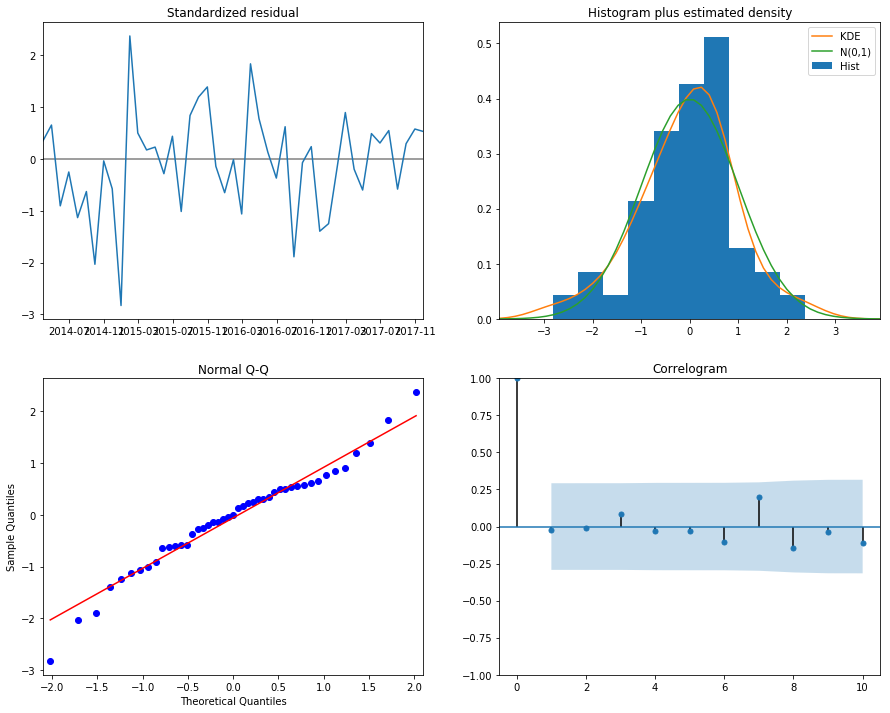

In [85]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

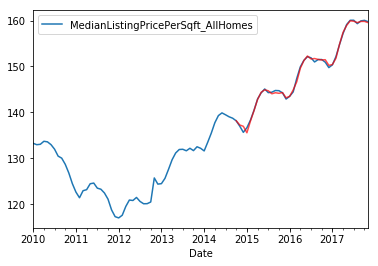

In [88]:
train_size = int(len(allhomes) * 0.60)
train, test = allhomes[0:train_size], allhomes[train_size:]

pred = results.get_prediction(start = test.iloc(train_size)[0].name, dynamic = False)
pred_ci = pred.conf_int()

ax = allhomes.plot(label='actual', figsize=(10,8))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=0.7, color='red')
plt.show()


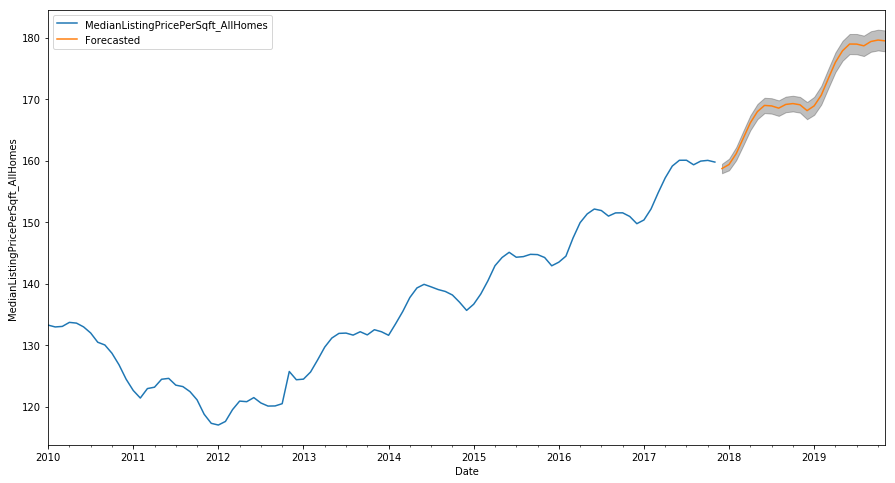

In [92]:
pred_uc = results.get_forecast(steps=24)

pred_ci = pred_uc.conf_int()

ax = allhomes.plot(label = 'Actual', figsize=(15,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecasted')
ax.fill_between(pred_ci.index,
                   pred_ci.iloc[:,0],
                   pred_ci.iloc[:,1],
                   color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('MedianListingPricePerSqft_AllHomes')
plt.legend()
plt.show()


In [78]:
y_forecasted = pred.predicted_mean
y_series = pd.Series(allhomes['MedianListingPricePerSqft_AllHomes'].values, index = allhomes.index)

y_truth = y_series.iloc[49:]

mse = ((y_forecasted - y_truth) ** 2).mean()

print(mse)

10.5971360689631


In [82]:
from sklearn.metrics import mean_squared_error
y_truth = allhomes.iloc[49:]
mse = mean_squared_error(y_truth, y_forecasted)
print(mse)

10.597136069


In [83]:
import warnings
from pandas import datetime
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import itertools
warnings.filterwarnings("ignore")

#evaluate SARIMAX model for given order & seasonal order
def evaluate_sarimax_model(dataset, param, seasonal_param):
    #train test split
    train_size = int(len(dataset) * 0.60)
    train, test = dataset[0:train_size], dataset[train_size:]
    try:
        mod = sm.tsa.statespace.SARIMAX(dataset,
                                       order = param,
                                       seasonal_order = seasonal_param,
                                       enforce_stationarity = False,
                                       enforce_invertibility = False)
        results = mod.fit()
        pred = results.get_prediction(start = test.iloc(train_size)[0].name, dynamic = False)
        pred_ci = pred.conf_int()
        error = mean_squared_error(test, pred.predicted_mean)
        return error
        print('SARIMAX results for {} {} AIC {} MSE {}'.format(param, seasonal_param, results.aic, mse))
    except:
        return float("inf")

def evaluate_models(dataset, p_values, d_values, q_values, s_value):
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], s_value) for x in list(itertools.product(p, d, q))]
    best_score = float("inf")
    best_param = best_seasonal_param = None
    for param in pdq:
        for seasonal_param in seasonal_pdq:
            try:
                mse = evaluate_sarimax_model(dataset, param, seasonal_param)
                #print(best_score, mse)
                if mse < best_score:
                    best_score, best_param, best_seasonal_param = mse, param, seasonal_param
                print('SARIMAX results for {} {} MSE {}'.format(param, seasonal_param, mse))
            except:
                continue
    print('Best results are mse {} order {} seasonal order {}'.format(best_score, best_param, best_seasonal_param))

In [70]:
type(allhomes.unstack().head())

pandas.core.series.Series